# PME3481 - Controle e Aplicações

## Síntese por Alocação de Polos

Se baseia em alocar os polos já existentes no sistema de modo a conseguir estabilizá-lo adequadamente.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl
import scipy

### Definição do Sistema

Agora, utilizando nas matrizes do problema

In [2]:
Xcm = 1.052
Xpe = 0.261
L = 3.304
Df = 0.127
Tlin = 230.57
Izz = 15.07
M = 23.545
g = 9.8055
dar = 1.091
Cd = 0.432
Vxlin = -10.0

In [3]:
''' X = [x,y,theta,xp,yp,thetap]
Xp = [xp,yp,thetap,xpp,ypp,thetapp]
X = [x,y,theta,xp,yp,thetap]
Xp = [xp,yp,thetap,xpp,ypp,thetapp]'''

A = np.array([[0, 0, 0, 1],
              [(1/M)*((1/2)*dar*Cd*Vxlin**2*L*Df), (1/M)*(Vxlin *dar*Cd*((Df/2)**2*np.pi)), 0, 0],
              [(1/M)*(-M*g+(1/2)*Vxlin**2*dar*Cd*(np.pi*(Df/2)**2)), 0, 0, 0],
              [(1/Izz)*((1/2)*Vxlin**2*dar*Xpe*Cd*(np.pi*(Df/2)**2)), 0, 0, 0]])

B = np.array([[0, 0],
              [1/M, 0],
              [0, -Tlin/M],
              [0, -Tlin*Xcm/Izz]])

C = np.array([[ 1, 0, 0, 0],
              [ 0, 1, 0, 0],
              [ 0, 0, 1, 0],
              [ 0, 0, 0, 1]])

D = np.array([[ 0, 0],
              [ 0, 0],
              [ 0, 0],
              [ 0, 0]])                                                     

cont = ctrl.StateSpace(A, B, C, D)
sist = ctrl.ss(A, B, C, D)

sist

<LinearIOSystem:sys[3]:['u[0]', 'u[1]']->['y[0]', 'y[1]', 'y[2]', 'y[3]']>

Algumas análises do modelo

### Polos em Malha Aberta

[-0.00253575+0.j  0.        +0.j  0.07190375+0.j -0.07190375+0.j]


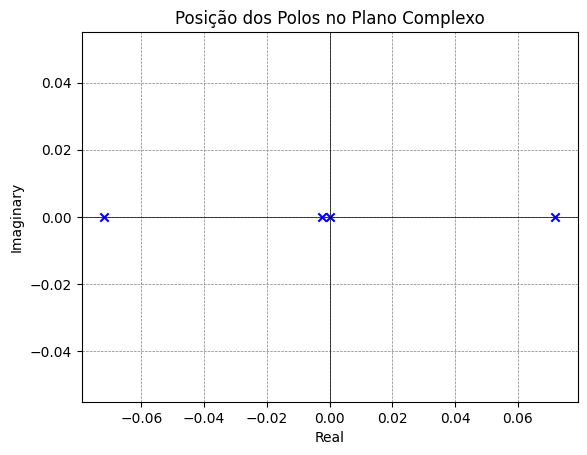

In [14]:
wn, zeta, poles = cont.damp()
print(poles)

# Plot the poles on a complex plane
plt.figure()
plt.scatter(poles.real, poles.imag, marker='x', color='b')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title('Posição dos Polos no Plano Complexo')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.show()

In [5]:
# Create the state-space model
sys = ctrl.ss(A, B, C, D)

### Reposta em Degrau em Malha Aberta

Com um degrau, a reposta do sistema em malha aberta é obtido como abaixo, que mostra a direção que cada variável tende quando em resposta no tempo

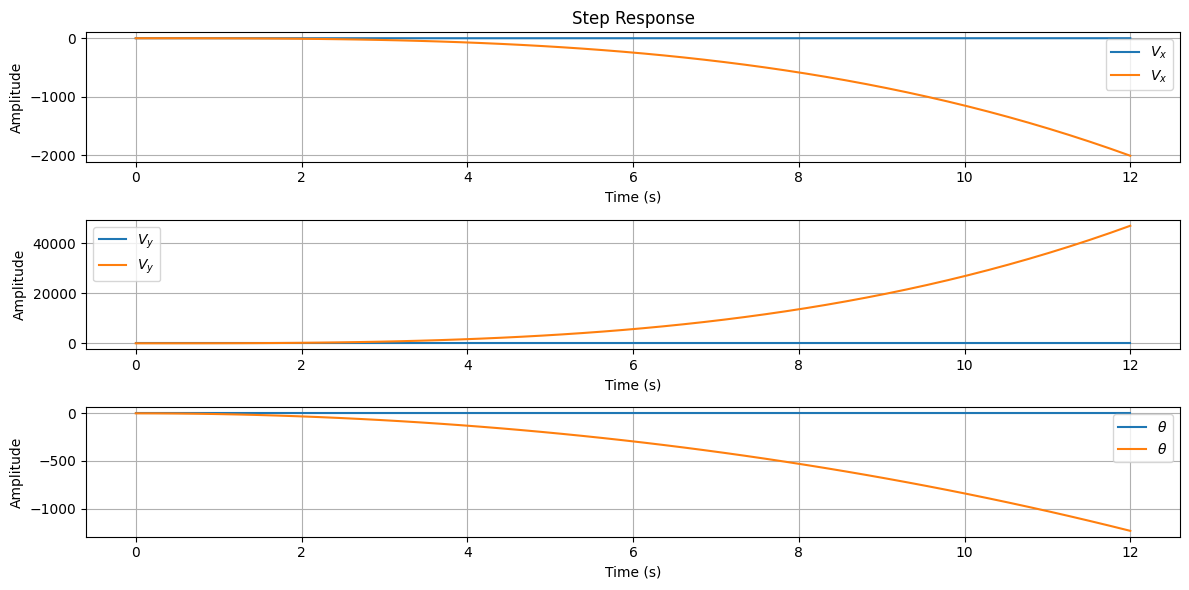

In [6]:
# Plot the step response
plt.figure(figsize=(12, 6))

# Plot x response
plt.subplot(3, 1, 1)
t = np.linspace(0, 12)  # Time range from 0 to 12 seconds
t, y = ctrl.step_response(sys, T=t)
plt.plot(t, y[1].T, label=r'$V_x$')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Step Response')
plt.legend()
plt.grid()

# Plot y response
plt.subplot(3, 1, 2)
plt.plot(t, y[2].T, label=r'$V_y$')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

# Plot theta response
plt.subplot(3, 1, 3)
plt.plot(t, y[0].T, label=r'$\theta$')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

### Alocação de Polos

In [7]:
# Desired poles
p = [-1,  -0.5 ,  -0.5 ,-2]

#p = [-2.5,-2.5, -3,-1]

# Calculate the gain matrix K using pole placement
Kbun = scipy.signal.place_poles(A, B, p, method='YT')
K = Kbun.gain_matrix
print(K)

# Compute the closed-loop system
Acl = A - np.dot(B, K)
syscl = ctrl.ss(Acl, B, C, D)
# Print the poles of the closed-loop system
wn, zeta , p = sys.damp()
print("Poles of the opened-loop system:", p)
#print("Zetas of the opened-loop system:", zeta)
#print("Wns of the opened-loop system:", wn)

wnk, zetak , pk = syscl.damp()
print("Poles of the closed-loop system:", pk)
print("Zetas of the closed-loop system:", zetak)
#print("Wns of the closed-loop system:", wnk)

#[-1. +0.j -3. +0.j -2.5+0.j -2.5+0.j]

[[ 9.88831428e+00  1.17127957e+01  1.11792083e-13 -1.39564352e-12]
 [-2.17772891e-01  6.00627508e-17  6.34230915e-03 -2.21310421e-01]]
Poles of the opened-loop system: [-0.00253575+0.j  0.        +0.j  0.07190375+0.j -0.07190375+0.j]
Poles of the closed-loop system: [-2. +0.j -1. +0.j -0.5+0.j -0.5+0.j]
Zetas of the closed-loop system: [1. 1. 1. 1.]


Os polos, em malha fechada, podem ser posicionados no plano como na figura abaixo

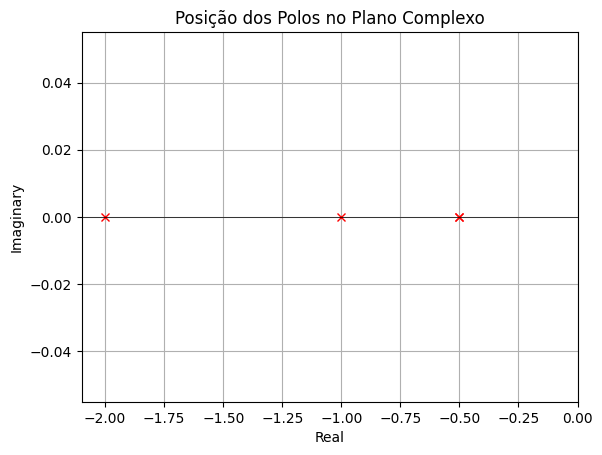

In [8]:
plt.figure(1)
ax = plt.gca()
#plt.plot(p.real, p.imag, 'bx',label = 'Polos em malha aberta' )
plt.plot(pk.real, pk.imag, 'rx',label = 'Polos em malha fechada')
plt.box(on = bool)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.xlim([-2.1,0])
plt.title('Posição dos Polos no Plano Complexo')
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.grid()
plt.show()

In [9]:
u = [0, 0]
X0  = [0.1, 10, 0, 0]
tempo = np.linspace(0, 90, 400000)

t, amp,yr = ctrl.forced_response(syscl, tempo, 0 ,X0,return_x = 'True')

### Respostas em Malha Fechada

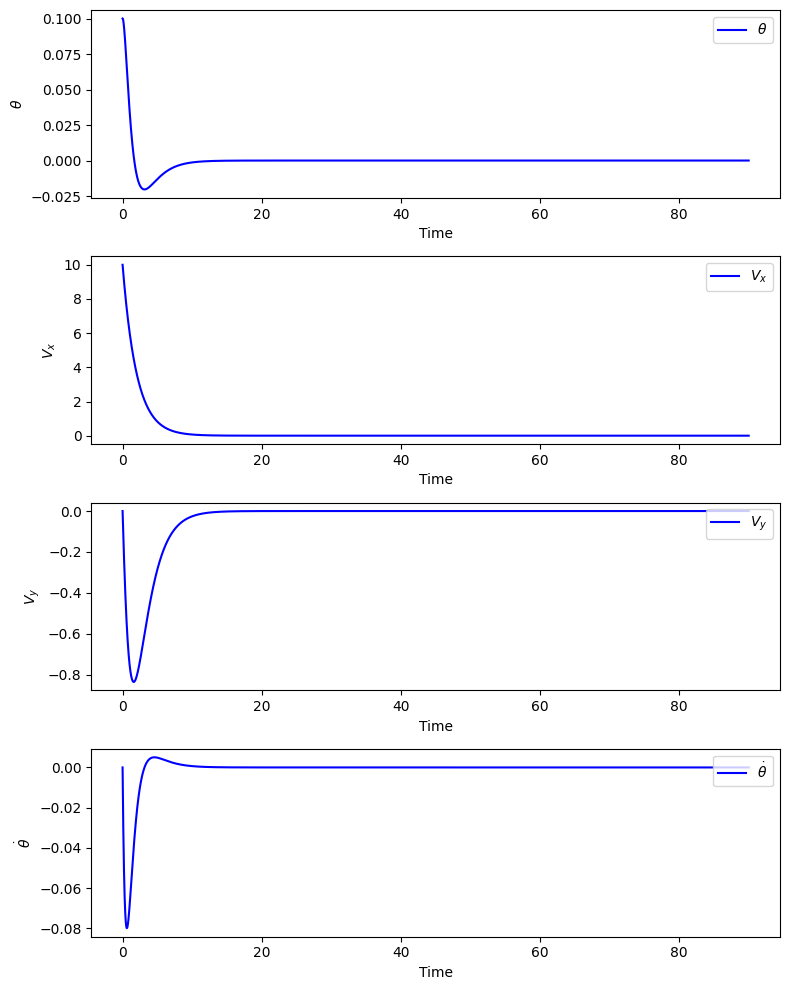

In [10]:
fig, axes = plt.subplots(4, 1, figsize=(8, 10))

# Plot Theta
axes[0].plot(t, yr[0], color='blue')
axes[0].set_ylabel(r'$\theta$')
axes[0].set_xlabel('Time')
axes[0].legend([r'$\theta$'], loc='upper right')

# Plot VX
axes[1].plot(t, yr[1], color='blue')
axes[1].set_ylabel(r'$V_x$')
axes[1].set_xlabel('Time')
axes[1].legend([r'$V_x$'], loc='upper right')

# Plot Vy
axes[2].plot(t, yr[2], color='blue')
axes[2].set_ylabel(r'$V_y$')
axes[2].set_xlabel('Time')
axes[2].legend([r'$V_y$'], loc='upper right')

# Plot Thetap
axes[3].plot(t, yr[3], color='blue')
axes[3].set_ylabel(r'$\dot{\theta}$')
axes[3].set_xlabel('Time')
axes[3].legend([r'$\dot{\theta}$'], loc='upper right')

plt.tight_layout()
plt.show()

In [11]:
u = np.dot(-K,yr)

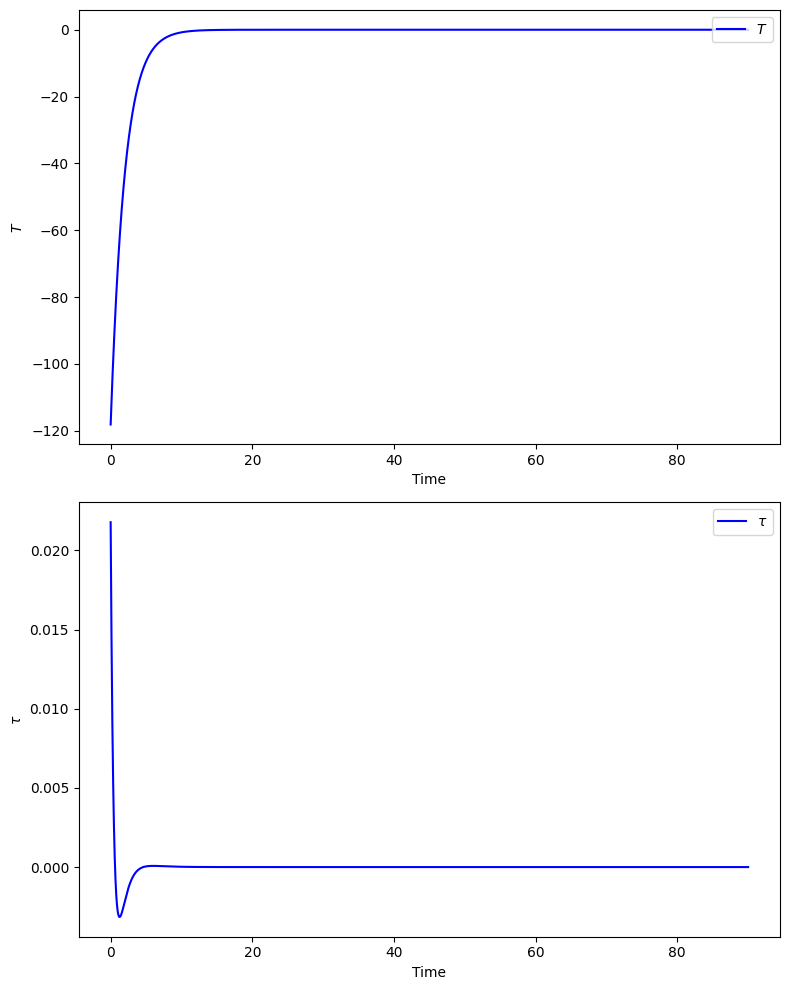

In [12]:
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# Plot Theta
axes[0].plot(t, u[0], color='blue')
axes[0].set_ylabel(r'$T$')
axes[0].set_xlabel('Time')
axes[0].legend([r'$T$'], loc='upper right')

# Plot VX
axes[1].plot(t, u[1], color='blue')
axes[1].set_ylabel(r'$\tau$')
axes[1].set_xlabel('Time')
axes[1].legend([r'$\tau$'], loc='upper right')

plt.tight_layout()
plt.show()